In [106]:
#Import libraries
import math
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from scipy.stats import spearmanr

In [128]:
#Load Data
df = pd.read_csv('C:/Users/USER/Desktop/Turing Data Analytics_Science_Test/covid_data.csv')

In [129]:
df.head()

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
0,Afghanistan,2019-12-31,0,0,38928341.0,2.581,1803.987,0.5
1,Afghanistan,2020-01-01,0,0,38928341.0,2.581,1803.987,0.5
2,Afghanistan,2020-01-02,0,0,38928341.0,2.581,1803.987,0.5
3,Afghanistan,2020-01-03,0,0,38928341.0,2.581,1803.987,0.5
4,Afghanistan,2020-01-04,0,0,38928341.0,2.581,1803.987,0.5


In [130]:
#Which country has the 3rd highest death rate? Death Rate: The total number of death per million inhabitants.

death_rate_country = df.groupby(['location'])['new_deaths'].value_counts().sort_values(ascending= True).sample(3)



location            new_deaths
Dominican Republic  11            4
Canada              172           2
World               4701          1
Name: new_deaths, dtype: int64


In [126]:
print(death_rate_country)

location   new_deaths
Argentina  44            1
Ukraine    16            1
Belgium    306           1
Name: new_deaths, dtype: int64


In [ ]:
df2 = df.sort_values('popularity', ascending= True).sample(20)

In [116]:
#Which country has the 3rd highest death rate? Death Rate: The total number of death per million inhabitants.
death_stats = df.groupby(['location'])['new_deaths'].agg(['mean', 'count', 'std'])
death_stats

,mean,count,std
location,,,
Afghanistan,2.509804,153,5.069410
Albania,0.361702,94,0.685504
Algeria,4.582278,158,6.547441
Andorra,0.573034,89,0.890450
Angola,0.049383,81,0.269316
...,...,...,...
Western Sahara,0.021739,46,0.147442
World,2522.668712,163,2692.403374
Yemen,2.048387,62,3.423293


In [114]:
stats = df.groupby(['location'])['new_cases'].agg(['mean', 'count', 'std'])
print(stats)

                        mean  count           std
location                                         
Afghanistan       140.254902    153    244.073154
Albania            13.819149     94      8.044183
Algeria            65.708861    158     72.984974
Andorra             9.573034     89     14.016133
Angola              1.185185     81      1.969207
...                      ...    ...           ...
Western Sahara      0.500000     46      2.639444
World           44235.963190    163  43946.960111
Yemen               8.451613     62     11.272595
Zambia             14.285714     84     35.232984
Zimbabwe            3.829268     82     10.072337

[212 rows x 3 columns]


In [5]:
df.describe()

,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
count,23082.000000,23082.000000,2.301800e+04,20643.000000,20711.000000,19144.000000
mean,624.769257,35.629062,1.037003e+08,9.758570,22708.384791,3.204687
std,5517.309068,330.986941,6.716897e+08,6.445662,21187.826121,2.593700
min,-2461.000000,-1918.000000,8.090000e+02,1.144000,661.240000,0.100000
25%,0.000000,0.000000,2.083380e+06,3.853000,6426.674000,1.400000
50%,3.000000,0.000000,9.449321e+06,7.646000,15524.995000,2.600000
75%,55.000000,1.000000,3.346920e+07,15.322000,35220.084000,4.210000
max,133510.000000,10520.000000,7.794799e+09,27.049000,116935.600000,13.800000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23082 entries, 0 to 23081
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   location                    23082 non-null  object 
 1   date                        23082 non-null  object 
 2   new_cases                   23082 non-null  int64  
 3   new_deaths                  23082 non-null  int64  
 4   population                  23018 non-null  float64
 5   aged_65_older_percent       20643 non-null  float64
 6   gdp_per_capita              20711 non-null  float64
 7   hospital_beds_per_thousand  19144 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 1.4+ MB


In [7]:
df.isna().sum()

location                         0
date                             0
new_cases                        0
new_deaths                       0
population                      64
aged_65_older_percent         2439
gdp_per_capita                2371
hospital_beds_per_thousand    3938
dtype: int64

In [8]:
df.shape

(23082, 8)

In [50]:
# Compute the correlation matrix
corr = df.corr()
corr

,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
new_cases,1.000000,0.918490,0.659213,0.017650,0.011510,-0.012415
new_deaths,0.918490,1.000000,0.624136,0.038495,0.017184,-0.012647
population,0.659213,0.624136,1.000000,-0.022974,-0.052764,-0.029950
aged_65_older_percent,0.017650,0.038495,-0.022974,1.000000,0.461649,0.648919
gdp_per_capita,0.011510,0.017184,-0.052764,0.461649,1.000000,0.255495
hospital_beds_per_thousand,-0.012415,-0.012647,-0.029950,0.648919,0.255495,1.000000


<AxesSubplot:ylabel='Frequency'>

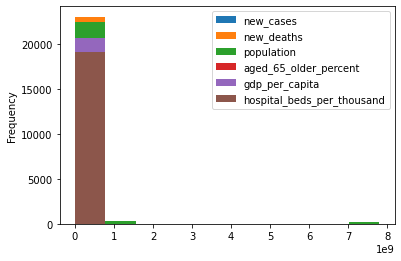

In [45]:
df.plot.hist()

<AxesSubplot:xlabel='[new_cases]', ylabel='[new_deaths]'>

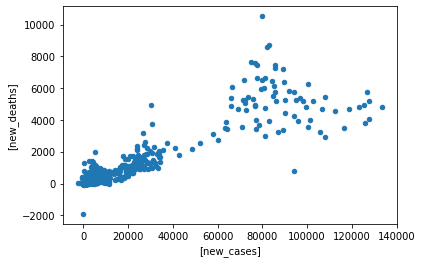

In [48]:
#There is a positive correlation between new_cases and new_deaths
df.plot.scatter(x = ['new_cases'], y = ['new_deaths'])

<AxesSubplot:xlabel='new_cases', ylabel='new_deaths'>

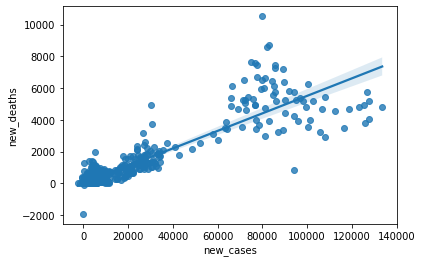

In [47]:
#There is a positive correlation between new_cases and new_deaths
sns.regplot(x = df['new_cases'], y = df['new_deaths'], data = df)

In [31]:
#Load Data
df1 = pd.read_csv('C:/Users/USER/Desktop/Turing Data Analytics_Science_Test/cardio_base.csv')

df2 = pd.read_csv('C:/Users/USER/Desktop/Turing Data Analytics_Science_Test/cardio_alco.csv', sep = ',')

In [12]:
df1.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
0,0,18393,2,168,62.0,110,80,1,0
1,1,20228,1,156,85.0,140,90,3,0
2,2,18857,1,165,64.0,130,70,3,0
3,3,17623,2,169,82.0,150,100,1,0
4,4,17474,1,156,56.0,100,60,1,0


In [17]:
df1.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
69995,99993,19240,2,168,76.0,120,80,1,1
69996,99995,22601,1,158,126.0,140,90,2,0
69997,99996,19066,2,183,105.0,180,90,3,0
69998,99998,22431,1,163,72.0,135,80,1,0
69999,99999,20540,1,170,72.0,120,80,2,0


In [66]:
h = df1.sort_values('height', ascending= True).sample(20)

In [70]:
h['height'].sum()*0.01

32.7

In [71]:
32.7 * 183

5984.1

In [68]:
h['height'].describe()

count     20.000000
mean     163.500000
std        7.465711
min      154.000000
25%      158.750000
50%      160.000000
75%      167.250000
max      183.000000
Name: height, dtype: float64

In [86]:
coef, p = spearmanr(df1['age'], ['weight'])

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 70000 and the array at index 1 has size 1

In [88]:
df1.corr(method='spearman', min_periods=1)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
id,1.000000,0.002682,0.003506,-0.001886,-0.001292,0.003258,-0.000238,0.005706,-0.003697
age,0.002682,1.000000,-0.020176,-0.082292,0.061559,0.219087,0.156700,0.140113,-0.047471
gender,0.003506,-0.020176,1.000000,0.533805,0.172480,0.063174,0.066374,-0.035730,0.338135
height,-0.001886,-0.082292,0.533805,1.000000,0.313569,0.019381,0.030534,-0.058940,0.197632
weight,-0.001292,0.061559,0.172480,0.313569,1.000000,0.277749,0.254420,0.137908,0.071676
ap_hi,0.003258,0.219087,0.063174,0.019381,0.277749,1.000000,0.735436,0.208722,0.028929
ap_lo,-0.000238,0.156700,0.066374,0.030534,0.254420,0.735436,1.000000,0.167401,0.026172
cholesterol,0.005706,0.140113,-0.035730,-0.058940,0.137908,0.208722,0.167401,1.000000,0.015220
smoke,-0.003697,-0.047471,0.338135,0.197632,0.071676,0.028929,0.026172,0.015220,1.000000


In [75]:
coef

array([[ 1.00000000e+00,  2.68171870e-03,  3.50621575e-03,
        -1.88649807e-03, -1.29161828e-03,  3.25755195e-03,
        -2.38177941e-04,  5.70591385e-03, -3.69749234e-03],
       [ 2.68171870e-03,  1.00000000e+00, -2.01764192e-02,
        -8.22922601e-02,  6.15589383e-02,  2.19086526e-01,
         1.56699526e-01,  1.40113032e-01, -4.74713951e-02],
       [ 3.50621575e-03, -2.01764192e-02,  1.00000000e+00,
         5.33804513e-01,  1.72479948e-01,  6.31735350e-02,
         6.63740711e-02, -3.57298143e-02,  3.38135136e-01],
       [-1.88649807e-03, -8.22922601e-02,  5.33804513e-01,
         1.00000000e+00,  3.13569270e-01,  1.93812657e-02,
         3.05338058e-02, -5.89404085e-02,  1.97632409e-01],
       [-1.29161828e-03,  6.15589383e-02,  1.72479948e-01,
         3.13569270e-01,  1.00000000e+00,  2.77748856e-01,
         2.54419787e-01,  1.37907934e-01,  7.16756168e-02],
       [ 3.25755195e-03,  2.19086526e-01,  6.31735350e-02,
         1.93812657e-02,  2.77748856e-01,  1.000000

In [76]:
p

array([[0.00000000e+000, 4.78011346e-001, 3.53592381e-001,
        6.17700480e-001, 7.32558522e-001, 3.88767793e-001,
        9.49754691e-001, 1.31138312e-001, 3.27950497e-001],
       [4.78011346e-001, 0.00000000e+000, 9.36531875e-008,
        1.90210292e-105, 9.53045240e-060, 0.00000000e+000,
        0.00000000e+000, 9.24506026e-304, 3.22244502e-036],
       [3.53592381e-001, 9.36531875e-008, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 7.84970260e-063,
        3.50562905e-069, 3.19733142e-021, 0.00000000e+000],
       [6.17700480e-001, 1.90210292e-105, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 2.92539609e-007,
        6.46472548e-016, 6.47679437e-055, 0.00000000e+000],
       [7.32558522e-001, 9.53045240e-060, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 2.98475379e-294, 2.15686405e-080],
       [3.88767793e-001, 0.00000000e+000, 7.84970260e-063,
        2.92539609e-007, 0.00000000e+000, 0.0000000

In [ ]:
rho, p = spearmanr(df['math'], df['science'])

In [83]:
def display_correlation(df1):
    r = df.corr(method="spearman")
    plt.figure(figsize=(10,6))
    heatmap = sns.heatmap(df1.corr(), vmin=-1, 
                      vmax=1, annot=True)
    plt.title("Spearman Correlation")
    return(r)

In [85]:
display_correlation()

TypeError: display_correlation() missing 1 required positional argument: 'df1'

<AxesSubplot:>

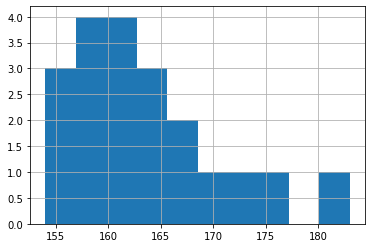

In [67]:
h['height'].hist(bins=10)

In [61]:
df1.groupby(['gender'])['smoke'].sum()

gender
1     813
2    5356
Name: smoke, dtype: int64

In [56]:
age_weight = df1.groupby('age')['weight']

In [57]:
age_weight

In [13]:
df1.shape

(70000, 9)

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   smoke        70000 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 4.8 MB


In [14]:
df1.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,0.088129
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.283484
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,0.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,1.000000


In [97]:
df1['height'].mean()

164.35922857142856

In [99]:
0.95 * 164.35922857142856

156.14126714285712

In [90]:
df1.std()

id             28851.302323
age             2467.251667
gender             0.476838
height             8.210126
weight            14.395757
ap_hi            154.011419
ap_lo            188.472530
cholesterol        0.680250
smoke              0.283484
dtype: float64

In [95]:
df1['id'].count()

70000

In [18]:
df1.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
smoke          0
dtype: int64

In [32]:
df2.head()

,id,alco
0,44,0
1,45,0
2,46,0
3,47,0
4,49,0


In [36]:
df2.shape

(56903, 2)

In [33]:
#join df1 and df2 on id
df_full = pd.merge(df1, df2, how='outer', on='id')

In [34]:
df_full.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,alco
0,0,18393,2,168,62.0,110,80,1,0,NaN
1,1,20228,1,156,85.0,140,90,3,0,NaN
2,2,18857,1,165,64.0,130,70,3,0,NaN
3,3,17623,2,169,82.0,150,100,1,0,NaN
4,4,17474,1,156,56.0,100,60,1,0,NaN


In [37]:
df_full.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,alco
69995,99993,19240,2,168,76.0,120,80,1,1,NaN
69996,99995,22601,1,158,126.0,140,90,2,0,NaN
69997,99996,19066,2,183,105.0,180,90,3,0,NaN
69998,99998,22431,1,163,72.0,135,80,1,0,NaN
69999,99999,20540,1,170,72.0,120,80,2,0,NaN


In [104]:
df_full['id'].count() / df_full['alco'].count() *100

123.0163611760364

In [35]:
df_full.shape

(70000, 10)

In [38]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 69999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         56903 non-null  float64
dtypes: float64(2), int64(8)
memory usage: 5.9 MB


In [39]:
df_full.isna().sum()

id                 0
age                0
gender             0
height             0
weight             0
ap_hi              0
ap_lo              0
cholesterol        0
smoke              0
alco           13097
dtype: int64

In [40]:
df_full.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,alco
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,56903.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,0.088129,0.053442
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.283484,0.224915
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,0.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,0.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,0.000000,0.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,1.000000,1.000000


In [107]:
print(df_full)
print('-'*30)

stats = df_full.groupby(['smoke'])['cholesterol'].agg(['mean', 'count', 'std'])
print(stats)
print('-'*30)

ci95_hi = []
ci95_lo = []

for i in stats.index:
    m, c, s = stats.loc[i]
    ci95_hi.append(m + 1.96*s/math.sqrt(c))
    ci95_lo.append(m - 1.96*s/math.sqrt(c))

stats['ci95_hi'] = ci95_hi
stats['ci95_lo'] = ci95_lo
print(stats)

          id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  smoke  \
0          0  18393       2     168    62.0    110     80            1      0   
1          1  20228       1     156    85.0    140     90            3      0   
2          2  18857       1     165    64.0    130     70            3      0   
3          3  17623       2     169    82.0    150    100            1      0   
4          4  17474       1     156    56.0    100     60            1      0   
...      ...    ...     ...     ...     ...    ...    ...          ...    ...   
69995  99993  19240       2     168    76.0    120     80            1      1   
69996  99995  22601       1     158   126.0    140     90            2      0   
69997  99996  19066       2     183   105.0    180     90            3      0   
69998  99998  22431       1     163    72.0    135     80            1      0   
69999  99999  20540       1     170    72.0    120     80            2      0   

       alco  
0       NaN  

In [112]:
stats = df_full.groupby(['smoke'])['gender'].agg(['mean', 'count', 'std'])
print(stats)
print('-'*30)

ci95_hi = []
ci95_lo = []

for i in stats.index:
    m, c, s = stats.loc[i]
    ci95_hi.append(m + 1.96*s/math.sqrt(c))
    ci95_lo.append(m - 1.96*s/math.sqrt(c))

stats['ci95_hi'] = ci95_hi
stats['ci95_lo'] = ci95_lo
print(stats)

           mean  count       std
smoke                           
0      1.299447  63831  0.458019
1      1.868212   6169  0.338288
------------------------------
           mean  count       std   ci95_hi   ci95_lo
smoke                                               
0      1.299447  63831  0.458019  1.303000  1.295894
1      1.868212   6169  0.338288  1.876654  1.859770


In [108]:
df_full.head(2)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,alco
0,0,18393,2,168,62.0,110,80,1,0,NaN
1,1,20228,1,156,85.0,140,90,3,0,NaN


In [41]:
df_full.groupby(by="gender")

<AxesSubplot:ylabel='Frequency'>

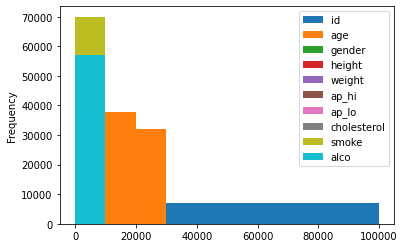

In [42]:
df_full.plot.hist()


<AxesSubplot:xlabel='gender', ylabel='alco'>

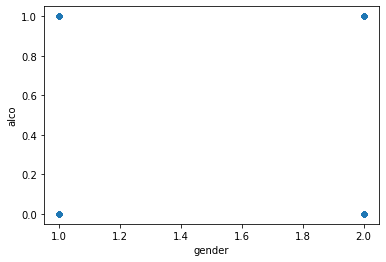

In [44]:
df_full.plot.scatter(x='gender',y='alco')